<a href="https://colab.research.google.com/github/MuhammadHaikalD4-TI/MuhammadHaikalD4-TI.github.io/blob/main/Kuis_2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2**

Disusun Oleh (KELOMPOK 5) :
1. M. Rohmatul Mauludi
2. M. Alfarizi Abdullah
3. M. Haikal Buldan

#**Import Library**

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np



#**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.3 MB/s eta 0:00:00


In [ ]:
from mtcnn.mtcnn import MTCNN

#**Preprocessing**

In [ ]:
def load_image(image_path_mtcnn):
    return cv2.imread(image_path_mtcnn)

def preprocces_image(image):
  # mengubah image menjadi grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # menggunakan GaussianBlur untuk mengurangi noise
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)

  # Tresholding
  th, threshed = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

  # Opening
  closing_image = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, (5,5))
  dilate = cv2.dilate(closing_image, (5,5))

  return dilate

#**Segmentation**

In [ ]:
def segmentasi(image):
  #reshape array ke bentuk 2D
  pixel_values = image.reshape((-1, 3))
  # convert to float
  pixel_values = np.float32(pixel_values)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  k = 2
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  #konversi titik centroid kedalam integer
  centers = np.uint8(centers)
  #flattening label array
  labels = labels.flatten()
  #konversi warna pixel asli kewarna dari tiap centroidnya
  segmented_image = centers[labels.flatten()]
  # reshape ke bentuk image asli
  segmented_image = segmented_image.reshape(image.shape)

  return segmented_image

#**Face Detection**

In [ ]:
def detect_face(image):
  marked = image.copy()
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  roi = face_cascade.detectMultiScale(marked, scaleFactor=1.2, minNeighbors=9, minSize=(30, 30))

  for (x, y, w, h) in roi:
        cv2.rectangle(marked, (x, y), (x+w, y+h), (255, 255, 255), 4)

  return marked

In [ ]:
def crop_image(image, face):
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  roi = face_cascade.detectMultiScale(face, scaleFactor=1.2, minNeighbors=9, minSize=(30, 30))
  for i, (x, y, w, h) in enumerate(roi, 1):
        croped_image = image[y:y+h, x:x+w]

  return croped_image

In [ ]:
def display(image, preprocessing, segmentation, detect, crop):

  plt.figure(figsize=(12, 4))

# Original Image
  plt.subplot(1, 5, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

# preprocessing
  plt.subplot(1, 5, 2)
  plt.imshow(cv2.cvtColor(preprocessing, cv2.COLOR_BGR2RGB))
  plt.title('Preprocessing')
  plt.axis('off')

# result Segmentasi
  plt.subplot(1, 5, 3)
  plt.imshow(cv2.cvtColor(segmentation, cv2.COLOR_BGR2RGB))
  plt.title('Segmentation')
  plt.axis('off')

# Gambar Faces Marked
  plt.subplot(1, 5, 4)
  plt.imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
  plt.title('Image with Faces Marked')
  plt.axis('off')

# Gambar Wajah yang Dipotong
  plt.subplot(1, 5, 5)
  plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
  plt.title('Hasil Crop')
  plt.axis('off')

# Show the plot
  plt.show()

In [ ]:
def process_image(image_path_mtcnn):
    # Load Gambar
    image = load_image(image_path_mtcnn)

    # Preprocess Image
    processed_image = preprocces_image(image)

    segment = segmentasi(processed_image)

    # Detect Faces
    faces = detect_face(segment)

    # Display Results
    crop = crop_image(image, faces)
    display(image, processed_image, segment, faces, crop)



In [ ]:
import cv2
import numpy as np

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Reshape the image to 2D array
    pixel_values = image.reshape((-1, 3))

    # Convert to float
    pixel_values = np.float32(pixel_values)

    # Your further processing goes here

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP FARIZ.jpg'
segmentasi(image_path)


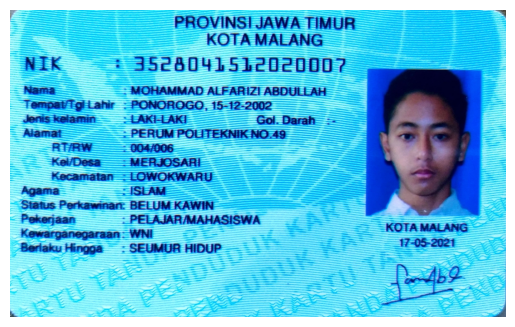

In [ ]:
import cv2
import matplotlib.pyplot as plt

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Display the original image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP FARIZ.jpg'
segmentasi(image_path)


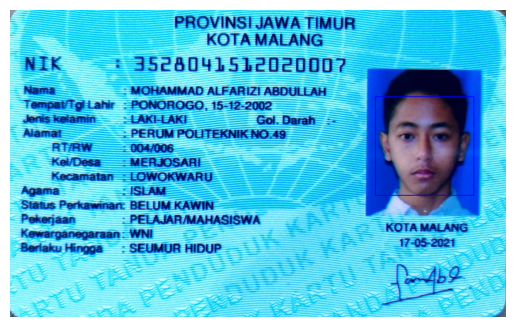

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the original image with face detection using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP FARIZ.jpg'
segmentasi(image_path)


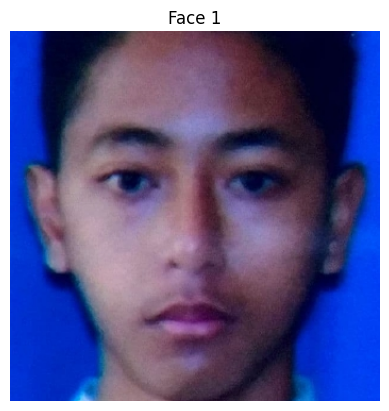

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_faces(image_path, output_folder):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Crop and save each detected face
    for i, (x, y, w, h) in enumerate(faces):
        # Crop the face region
        face_crop = image[y:y+h, x:x+w]

        # Save the cropped face
        face_filename = f"{output_folder}/face_{i+1}.jpg"
        cv2.imwrite(face_filename, face_crop)

        # Display the cropped face
        plt.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Face {i+1}")
        plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP FARIZ.jpg'
output_folder = '/content/drive/MyDrive/PCVK/cropped_faces'
crop_faces(image_path, output_folder)


In [ ]:
import cv2
import numpy as np

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Reshape the image to 2D array
    pixel_values = image.reshape((-1, 3))

    # Convert to float
    pixel_values = np.float32(pixel_values)

    # Your further processing goes here

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP HAIKAL.jpg'
segmentasi(image_path)

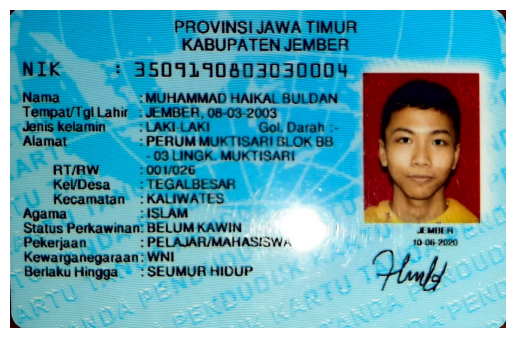

In [ ]:
import cv2
import matplotlib.pyplot as plt

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Display the original image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP HAIKAL.jpg'
segmentasi(image_path)

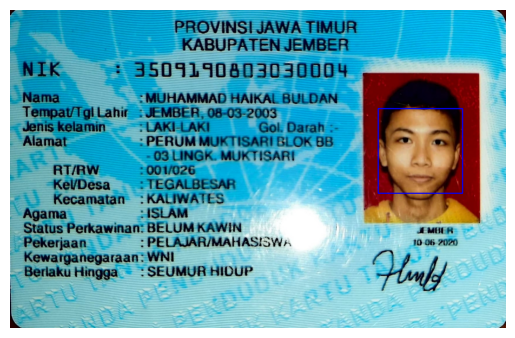

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segmentasi(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the original image with face detection using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP HAIKAL.jpg'
segmentasi(image_path)

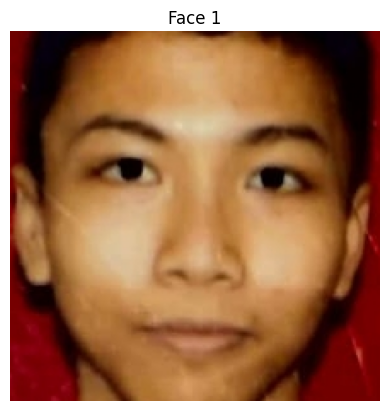

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_faces(image_path, output_folder):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Crop and save each detected face
    for i, (x, y, w, h) in enumerate(faces):
        # Crop the face region
        face_crop = image[y:y+h, x:x+w]

        # Save the cropped face
        face_filename = f"{output_folder}/face_{i+1}.jpg"
        cv2.imwrite(face_filename, face_crop)

        # Display the cropped face
        plt.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Face {i+1}")
        plt.show()

# Example usage
image_path = '/content/drive/MyDrive/PCVK/KTP HAIKAL.jpg'
output_folder = '/content/drive/MyDrive/PCVK/cropped_faces'
crop_faces(image_path, output_folder)